# 2-2维kmeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


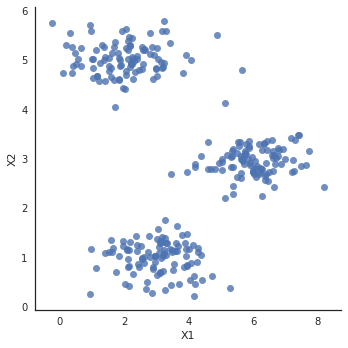

In [146]:
mat = sio.loadmat('./data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

# 0. random init
for initial centroids

In [147]:
def combine_data_C(data, C):
#     将原数据和新增的一列 c 进行组合
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c


# k-means fn --------------------------------
def random_init(data, k):
    """choose k sample from data set as init centroids
    Args:
        data: DataFrame
        k: int
    Returns:
        k samples: ndarray
    """
#     data中随机选择k行数据 并且转化为矩阵
    return data.sample(k).as_matrix()


#x -- 传入的’X'的坐标位置
# centroids 处理的点 计算与X的距离
def _find_your_cluster(x, centroids):
    """find the right cluster for x with respect to shortest distance
    Args:
        x: ndarray (n, ) -> n features
        centroids: ndarray (k, n)
    Returns:
        k: int
    """
    # 返回的是一个根据func()函数以及维度axis运算后得到的的数组.
    distances = np.apply_along_axis(func1d=np.linalg.norm,  # this give you l2 norm
                                    axis=1,
                                    arr=centroids - x)  # use ndarray's broadcast
    return np.argmin(distances)  #代表使得distances取得最小值的x的自变量x的值


def assign_cluster(data, centroids):
    """assign cluster for each node in data
    return C ndarray
    """
#     load进来的每一行数据传入 lambda函数 _find_your_cluster 
# 当前的这个点x与 上面定义的 三个聚类点centroids 计算距离 ，并打上标签  是和第几个的聚类点近 返回 标签
    return np.apply_along_axis(lambda x: _find_your_cluster(x, centroids),
                               axis=1,
                               arr=data.as_matrix())


def new_centroids(data, C):
    data_with_c = combine_data_C(data, C)
    
#     按照‘C’分组，算出x1 x2平均值，作为下一次的聚类的点，按照'C'排序，删除C这一列
    return data_with_c.groupby('C', as_index=False).\
                       mean().\
                       sort_values(by='C').\
                       drop('C', axis=1).\
                       as_matrix()


def cost(data, centroids, C):
    m = data.shape[0]

    #展开所有的元素对应的聚类的元素
    expand_C_with_centroids = centroids[C]
    
#     求距离点的范数
    distances = np.apply_along_axis(func1d=np.linalg.norm,
                                    axis=1,
                                    arr=data.as_matrix() - expand_C_with_centroids)
    return distances.sum() / m


def _k_means_iter(data, k, epoch=100, tol=0.0001):
    """one shot k-means
    with early break
    """
    centroids = random_init(data, k)
    cost_progress = []

    for i in range(epoch):
        print('running epoch {}'.format(i))

        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))

        if len(cost_progress) > 1:  # early break
            if (np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
                break

    return C, centroids, cost_progress[-1]


def k_means(data, k, epoch=100, n_init=10):
    """do multiple random init and pick the best one to return
    Args:
        data (pd.DataFrame)
    Returns:
        (C, centroids, least_cost)
    """

    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])

    least_cost_idx = np.argmin(tries[:, -1])

    return tries[least_cost_idx]


In [148]:
random_init(data2, 3)

array([[ 3.49798412,  1.10046402],
       [ 2.28664839,  5.0076699 ],
       [ 0.54845223,  5.0267298 ]])

In [149]:
data2.sample(5)

,X1,X2
192,2.023590,0.447716
235,5.860679,2.995771
277,4.372498,3.054882
220,5.766350,3.142717
103,1.402608,1.087265


# 1. cluster assignment
http://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

### find closest cluster experiment

In [153]:
init_centroids = random_init(data2, 3)
init_centroids

array([[ 1.60493227,  5.13663139],
       [ 5.91280273,  2.85631938],
       [ 6.63060699,  3.01502301]])

In [154]:
x = np.array([1, 1])

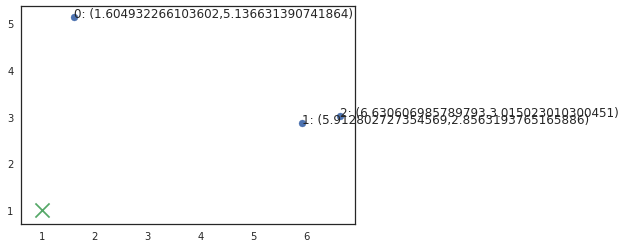

In [155]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:, 0], y=init_centroids[:, 1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({},{})'.format(i, node[0], node[1]), node)
    
# 在(1,1) 处标记‘X'
ax.scatter(x[0], x[1], marker='x', s=200)
plt.show()

In [156]:
init_centroids - x

array([[ 0.60493227,  4.13663139],
       [ 4.91280273,  1.85631938],
       [ 5.63060699,  2.01502301]])

In [157]:
_find_your_cluster(x, init_centroids)

0

### 1 epoch cluster assigning

In [158]:
data2.as_matrix()[0]

array([ 1.84207953,  4.6075716 ])

In [159]:
assign_cluster(data2, init_centroids)

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       0])

In [160]:
C = assign_cluster(data2, init_centroids)
data_with_c =combine_data_C(data2, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,1
2,6.352579,3.290854,2
3,2.904017,4.612204,0
4,3.231979,4.939894,0


See the first round clustering result

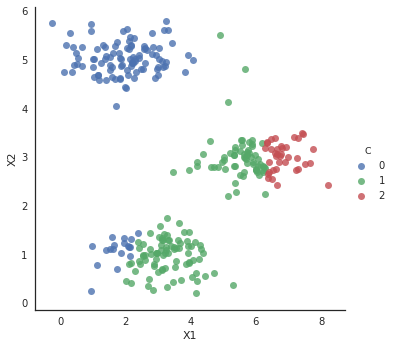

In [161]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# 2. calculate new centroid

In [162]:
data_with_c = combine_data_C(data2, C)

data_with_c.groupby('C', as_index=False).\
                   mean().\
                   sort_values(by='C').\
                   drop('C', axis=1).\
                   as_matrix()

array([[ 1.9208446 ,  4.41295148],
       [ 4.27875579,  1.85818684],
       [ 6.85182701,  3.00201087]])

In [163]:
new_centroids(data2, C)

array([[ 1.9208446 ,  4.41295148],
       [ 4.27875579,  1.85818684],
       [ 6.85182701,  3.00201087]])

In [164]:
s = new_centroids(data2, C)
s_expand = s[C]

In [165]:
distances = np.apply_along_axis(func1d=np.linalg.norm,
                                axis=1,
                                arr=data2.as_matrix() - s_expand)
distances.sum() / data2.shape[0]

1.3700196001647849

# putting all together, take1
this is just 1 shot `k-means`, if the random init pick the bad starting centroids, the final clustering may be very sub-optimal

In [166]:
final_C, final_centroid, _= _k_means_iter(data2, 3)
data_with_c = combine_data_C(data2, final_C)

running epoch 0
running epoch 1
running epoch 2


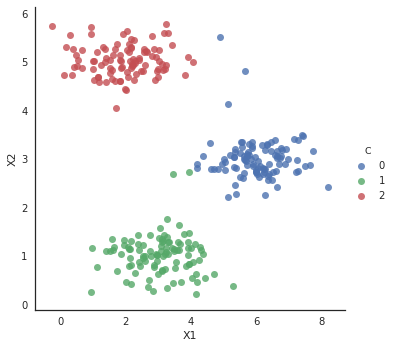

In [167]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# calculate the cost

In [168]:
cost(data2, final_centroid, final_C)

0.79417636337158704

# k-mean with multiple tries of randome init, pick the best one with least cost

In [169]:
best_C, best_centroids, least_cost = k_means(data2, 3)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 8
running epoch 9
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3


In [107]:
least_cost

0.79417636337158704

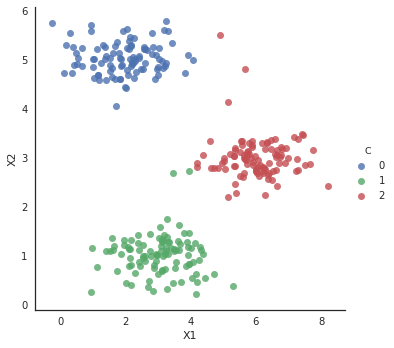

In [108]:
data_with_c = combine_data_C(data2, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# try sklearn kmeans

In [109]:
from sklearn.cluster import KMeans

In [110]:
sk_kmeans = KMeans(n_clusters=3)

In [111]:
sk_kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [112]:
sk_C = sk_kmeans.predict(data2)

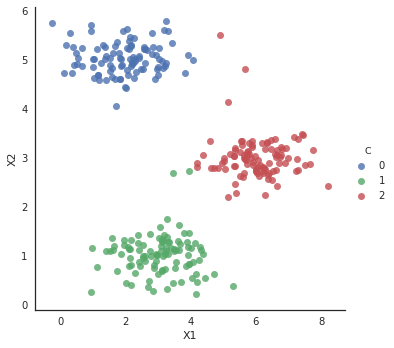

In [113]:
data_with_c = combine_data_C(data2, sk_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()